In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import itertools

In [151]:
# read data
df = pd.read_csv('data.csv')
"""
exang - Does pain starts with a certain activity? (1 = yes, 0 = no)
ca - Count of main vessels
cp - Chest pain type (
    1 = direct heart pain,
    2 = Indirect pain that causes pain in the heart,
    3 = Non-cardiac pain,
    4 = No symptoms
)
trtbps - Blood pressure while resting
chol - Cholesterol
fbs - Fasting blood sugar (1 = true, 0 = false)
restecg - Resting electrocardiographic results (
    0 = normal,
    1 = having ST-T wave abnormality,
    2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
)
thalach - Maximum heart rate achieved
target - Chance of heart attack (1 = high risk, 0 = low risk)
"""
df.head()
# df.dtypes

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [152]:
features = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng']]
x = np.asarray(features)
features.dtypes

age         int64
sex         int64
cp          int64
trtbps      int64
chol        int64
fbs         int64
restecg     int64
thalachh    int64
exng        int64
dtype: object

In [153]:
y = df[["output"]]
y = np.asarray(y)

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.15, random_state=42)

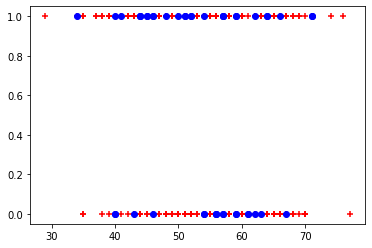

In [155]:
# plot data
plt.scatter(x_train[:, 0], y_train, color='red', label='train', marker='+')
plt.scatter(x_test[:, 0], y_test, color='blue', label='test', marker='o')
plt.show()

In [156]:
# model = svm.SVC(kernel='linear', C=1)
model = svm.SVC(kernel='rbf', C=1)
# model = svm.SVC(kernel='poly', C=1)

model.fit(x_train, y_train)
y_hat = model.predict(x_test)
# Acucuracy
print(accuracy_score(y_test, y_hat))

0.8043478260869565


/home/smbh/.virtualenvs/lab/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


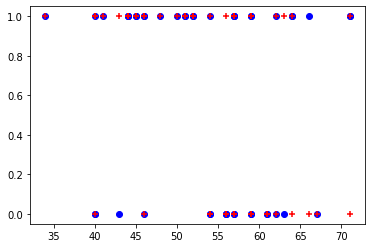

In [157]:
# plot
plt.scatter(x_test[:, 0], y_test, color='blue', label='test', marker='o')
plt.scatter(x_test[:, 0], y_hat, color='red', label='prediction', marker='+')
plt.show()

In [158]:
# plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        18
           1       0.83      0.86      0.84        28

    accuracy                           0.80        46
   macro avg       0.80      0.79      0.79        46
weighted avg       0.80      0.80      0.80        46

Confusion matrix, without normalization
[[13  5]
 [ 4 24]]


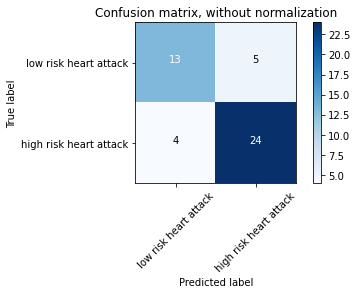

In [159]:
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat)
np.set_printoptions(precision=2)
print(classification_report(y_test, y_hat))

# plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['low risk heart attack', 'high risk heart attack'],
                        normalize=False,
                        title='Confusion matrix, without normalization')
                        